In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Phishing Data.csv') #import data set 

In [3]:
df

,Total Number of Characters C,Vocabulary richness W/C,Account,Access,Bank,Credit,Click,Identity,Inconvenience,Information,...,Password,Recently,Risk,Social,Security,Service,Suspended,Total number of Function words/W,Unique Words,Phishing Status
0,1673,0.128512,2,0,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0.027907,132,1
1,4465,0.137738,0,0,0,0,0,0,0,4,...,0,0,0,0,3,1,0,0.013008,338,1
2,6813,0.095993,0,0,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0.006116,292,1
3,1518,0.109354,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0.012048,102,1
4,1881,0.126528,7,3,0,0,0,1,0,2,...,0,0,0,0,0,0,2,0.063025,136,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525749,769,0.114434,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,69,0
525750,582,0.108247,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,55,0
525751,748,0.121658,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,66,0
525752,613,0.104405,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,62,0


In [4]:
df.shape

(525754, 22)

In [5]:
df['Phishing Status'].value_counts()

0    517402
1      8352
Name: Phishing Status, dtype: int64

In [6]:
#task:1 Analysis the dataset using seaborn / matplotlib / scatter
#task:3 Do sampling on given dataset and Create ML model and evaluate model by cross validation again
#task:4 Evaluate all results

# task:1

In [7]:
df.isnull().sum()

Total Number of Characters C        0
Vocabulary richness W/C             0
Account                             0
Access                              0
Bank                                0
Credit                              0
Click                               0
Identity                            0
Inconvenience                       0
Information                         0
Limited                             0
Minutes                             0
Password                            0
Recently                            0
Risk                                0
Social                              0
Security                            0
Service                             0
Suspended                           0
Total number of Function words/W    0
Unique Words                        0
Phishing Status                     0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(451085, 22)

# Basic Visualization 

<AxesSubplot:xlabel='Inconvenience', ylabel='count'>

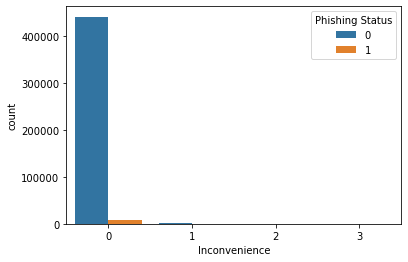

In [10]:
sns.countplot(x = 'Inconvenience', hue='Phishing Status', data=df)

<AxesSubplot:xlabel='Information', ylabel='count'>

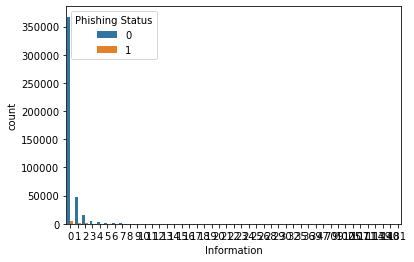

In [11]:
sns.countplot(x = 'Information', hue='Phishing Status', data=df)

<AxesSubplot:xlabel='Password', ylabel='count'>

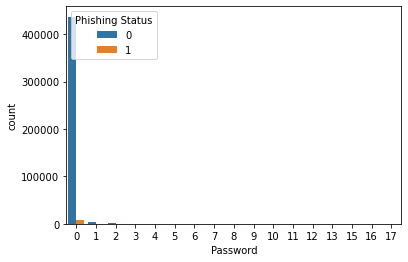

In [12]:
sns.countplot(x = 'Password', hue='Phishing Status', data=df)

<AxesSubplot:xlabel='Recently', ylabel='count'>

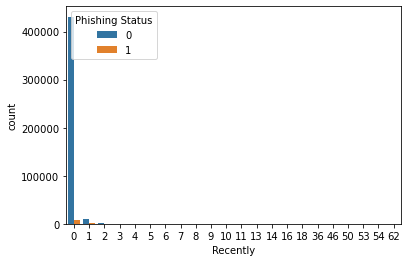

In [13]:
sns.countplot(x = 'Recently', hue='Phishing Status', data=df)

<AxesSubplot:xlabel='Risk', ylabel='count'>

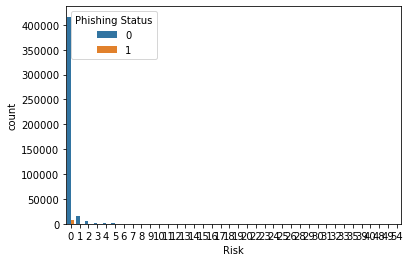

In [14]:
sns.countplot(x = 'Risk', hue='Phishing Status', data=df)

<AxesSubplot:xlabel='Security', ylabel='count'>

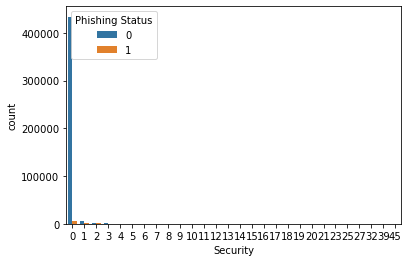

In [15]:
sns.countplot(x = 'Security', hue='Phishing Status', data=df)

<AxesSubplot:xlabel='Service', ylabel='count'>

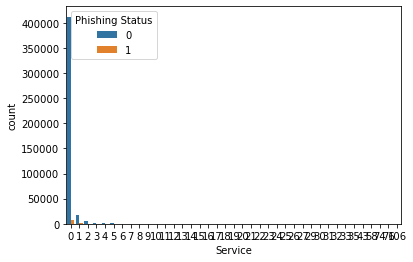

In [16]:
sns.countplot(x = 'Service', hue='Phishing Status', data=df)

<AxesSubplot:xlabel='Suspended', ylabel='count'>

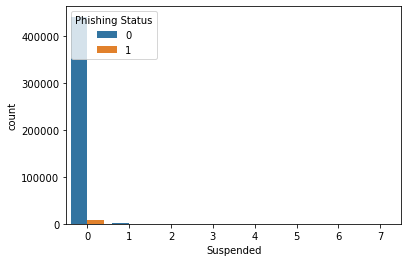

In [17]:
sns.countplot(x = 'Suspended', hue='Phishing Status', data=df)

# task 2:

In [18]:
x = df.drop('Phishing Status',axis=1) #separate dependent and independent variable
y = df['Phishing Status']

In [19]:
x.shape

(451085, 21)

In [20]:
y.shape

(451085,)

In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Phishing Status, dtype: int64

# Imbalanced Data Handling

In [22]:
df['Phishing Status'].value_counts()

0    442845
1      8240
Name: Phishing Status, dtype: int64

In [23]:
not_phishing= (442845/(442845+8240)) * 100
phishing = (8240/(442845+8240))*100

In [24]:
print('Not phishing {} percent '.format(not_phishing))
print('Phishing {} percent '.format(phishing))

Not phishing 98.173293281754 percent 
Phishing 1.8267067182460068 percent 


# Synthetic Minority Oversampling Technique (SMOTETomek)

In [25]:
!pip install imblearn

In [26]:
from imblearn.combine import SMOTETomek

In [27]:
sm = SMOTETomek(random_state=42)

In [28]:
y.value_counts()

0    442845
1      8240
Name: Phishing Status, dtype: int64

In [29]:
X,Y = sm.fit_resample(x,y)

In [30]:
X.shape

(883302, 21)

In [31]:
Y.shape

(883302,)

In [32]:
Y.value_counts()

1    441651
0    441651
Name: Phishing Status, dtype: int64

# Near Miss for Under_Sampling

In [33]:
from imblearn.under_sampling import NearMiss

In [34]:
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [35]:
new_y.value_counts()

0    8240
1    8240
Name: Phishing Status, dtype: int64

# Over Sampling

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
over = RandomOverSampler(random_state=100)

In [38]:
x_new , y_new = over.fit_resample(x,y)

In [39]:
y_new.value_counts()

1    442845
0    442845
Name: Phishing Status, dtype: int64

# Hold Out Cross Validation

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest, ytrain,ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42) 

In [42]:
train,  test = train_test_split(df, train_size=.75,random_state=42) 

In [43]:
train.to_csv('train_data.csv')

In [44]:
xtest.shape

(221423, 21)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
Clf = DecisionTreeClassifier() 

In [47]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [48]:
Clf.score(xtest,ytest)

0.9979134958879611

# XGBoost Classifier

In [49]:
!pip install xgboost

In [50]:
import xgboost 
from xgboost import XGBClassifier

In [51]:
xgb = XGBClassifier()

In [52]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [53]:
xgb.score(xtest,ytest)

0.979089796452943

# Ada Boost

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada = AdaBoostClassifier()

In [56]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [57]:
ada.score(xtest,ytest)

0.923196777209233

# K Fold Cross Validation

In [58]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [59]:
kfold = KFold(n_splits=4)

In [60]:
result = cross_val_score(Clf, x_new, y_new,cv=kfold) 

In [61]:
result

array([0.98998297, 0.98775195, 0.99957096, 1.        ])

In [62]:
result.mean()

0.9943264696654762

In [63]:
cross_validate = cross_validate(Clf, x_new, y_new,cv=kfold)

In [64]:
cross_validate

{'fit_time': array([6.49189687, 6.58565545, 6.47829175, 6.42602158]),
 'score_time': array([0.08824515, 0.0857687 , 0.11070609, 0.11269832]),
 'test_score': array([0.99020879, 0.9877655 , 0.99960709, 1.        ])}

In [65]:
result.max()

1.0

In [66]:
result.min()

0.9877519498877714

In [67]:
result.mean()

0.9943264696654762

# Stratified k fold cross Validation

In [68]:
from sklearn.model_selection import StratifiedKFold

In [69]:
st = StratifiedKFold(n_splits=4)

In [70]:
score2 = cross_val_score(Clf, x_new, y_new,cv=st)

In [71]:
score2

array([0.9957186 , 0.99594441, 0.99618827, 0.99527147])

In [72]:
score2.max()

0.9961882739745824

In [73]:
score2.min()

0.9952714725727344

In [74]:
score2.mean()

0.9957806906461237

# Leave One Out Cross Validation

In [75]:
from sklearn.model_selection import LeaveOneOut

In [76]:
le = LeaveOneOut()  

In [ ]:
result3 = cross_val_score(Clf,x,y,cv=le)

In [ ]:
result3